In [1]:
import numpy as np
import rebound
import matplotlib.pyplot as plt
from importlib import reload
from scipy.optimize import minimize

from integrator import *

# Simplified 4-body system

In [2]:
init_theta_4b = [1e-4, 1e-4, 1e-4, 4e-4,  # Initial eccentricities
              np.pi, np.pi, np.pi,        # Initial mean anomaly
              np.pi, 0, np.pi,            # Initial longitude of periastron
              1e-4, 1e-4,]                # X

configs_4b = {
    'planet_num': 4,
    'planet_mass': [1e-5, 1e-5, 1e-5, 1e-5],
    'kappa': 2.000180,
    'rho': 1,
    'C': [0.5, 0.5],
}

bounds = [(0, 0.99),(0, 0.99),(0, 0.99),(0, 0.99), 
          (None, None), (None, None), (None, None), 
          (None, None), (None, None), (None, None),
         (-.5, .5), (-.5, .5),]

results_4b = minimize(optimizing_function, *(init_theta_4b, configs_4b), bounds=bounds, tol=1e-12)

In [3]:
results_4b

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.0001011106036062222
        x: [ 7.083e-02  5.964e-02  6.728e-02  4.291e-02  2.319e+00
             2.315e+00  2.317e+00  2.740e+00 -7.172e-01  2.319e+00
            -1.737e-05 -3.653e-04]
      nit: 32
      jac: [ 2.313e-02  1.232e-04  2.148e-02 -8.088e-06  1.681e-04
             1.490e-02  1.753e-05  1.519e-02 -1.669e-04  1.664e-05
             9.559e-05 -4.832e-04]
     nfev: 2691
     njev: 207
 hess_inv: <12x12 LbfgsInvHessProduct with dtype=float64>

Text(0.5, 1.0, 'After')

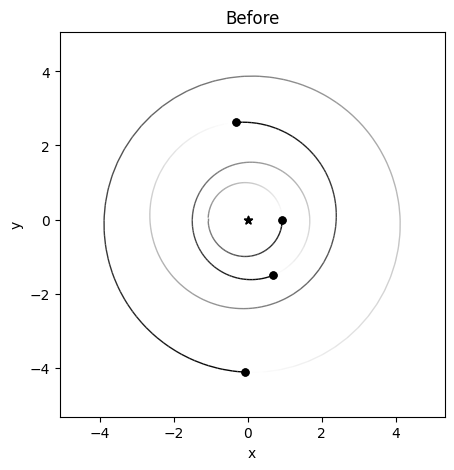

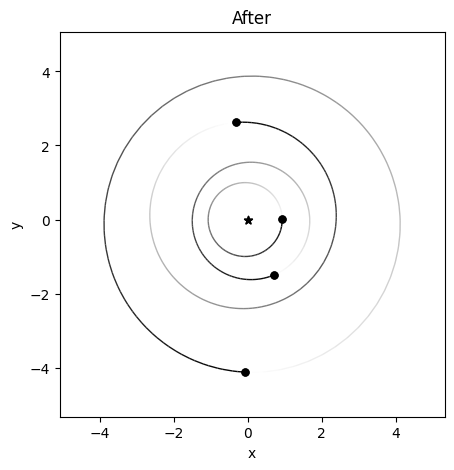

In [4]:
sim, theta, configs, _ = init_simulation(results_4b.x, configs_4b)
rebound.OrbitPlot(sim)
plt.title('Before')

sim, theta, configs, _ = init_simulation(results_4b.x, configs_4b)
integrate_one_cycle(sim)
rebound.OrbitPlot(sim)
plt.title('After')

In [5]:
calculate_mse(results_4b.x, configs_4b)

array([1.01901319e-05, 6.00286999e-05, 4.67930073e-07, 1.06155781e-07])